In [5]:
%matplotlib inline
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
# Importamos librerías para manejo de tiempo
import time


img = cv.imread('TP2/metalgrid.jpg', 0)

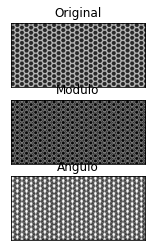

255


In [7]:
blur = cv.GaussianBlur(img, (5, 5), 0)
# blur=img

# Aplicamos Sobelx y Sobely en 'float32', luego encontramos el módulo y el ángulo:
sobelx_64 = cv.Sobel(blur, cv.CV_32F, 1, 0, ksize=3)
sobely_64 = cv.Sobel(blur, cv.CV_32F, 0, 1, ksize=3)

mod_G = np.sqrt(sobelx_64**2 + sobely_64**2)
angle_G = np.arctan(np.divide(sobely_64, sobelx_64+0.00001))

abs_64 = np.absolute(mod_G)
mod_G_8u1 = abs_64/abs_64.max()*255
mod_G_8u = np.uint8(mod_G_8u1)

abs_64 = np.absolute(angle_G)
angle_G_8u1 = abs_64/abs_64.max()*255
angle_G_8u = np.uint8(angle_G_8u1)

ax1 = plt.subplot(3, 1, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
ax2 = plt.subplot(3, 1, 2), plt.imshow(mod_G_8u, cmap='gray')
plt.title('Modulo'), plt.xticks([]), plt.yticks([])
ax3 = plt.subplot(3, 1, 3), plt.imshow(angle_G_8u, cmap='gray')
plt.title('Angulo'), plt.xticks([]), plt.yticks([])
plt.show()

mod_max_0 = np.max(mod_G_8u, axis=0)
mod_max_1 = np.max(mod_G_8u, axis=1)
mod_max = np.array([mod_max_0, mod_max_1])
